In [8]:

# Install required libraries (uncomment if needed)
# !pip install pandas numpy matplotlib seaborn scikit-learn joblib

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import joblib

# For nice plots
sns.set(style='whitegrid')


In [10]:

# Load dataset
df = pd.read_csv('data.csv')

# Preview data
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:

# Check for missing values
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:

# Clean 'TotalCharges' column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Drop 'customerID'
df.drop('customerID', axis=1, inplace=True)


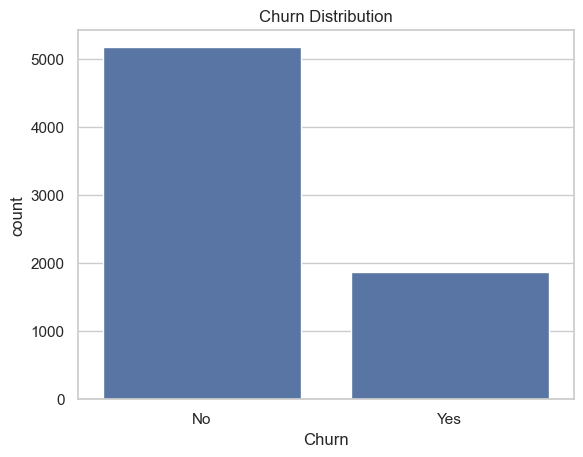

In [13]:

# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


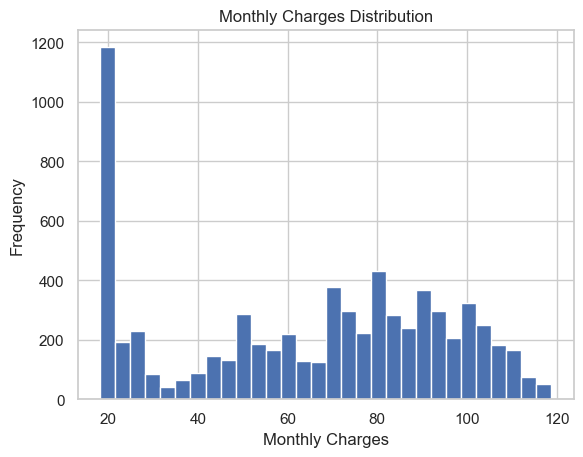

In [14]:

# Monthly Charges distribution
df['MonthlyCharges'].hist(bins=30)
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Monthly Charges Distribution')
plt.show()


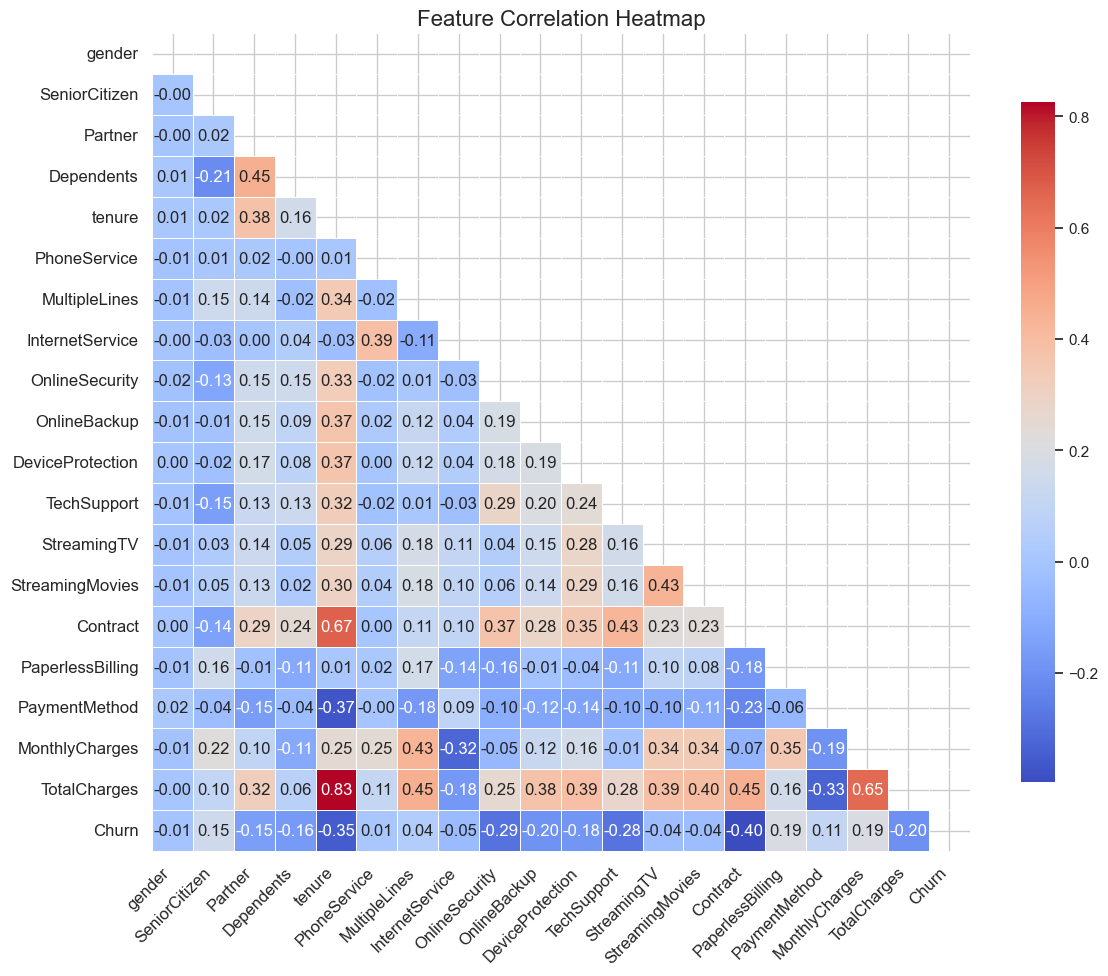

In [26]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr()

# Optional: create mask to hide upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up larger figure
plt.figure(figsize=(12, 10))  # try 12x10 or 14x12

# Plot heatmap
sns.heatmap(corr, 
            mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .8}, 
            annot_kws={"size": 12})  # increase font size here

# Titles and layout
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


In [17]:

# Encode categorical variables
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('Churn')

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Encode target
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Feature scaling
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [18]:

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


Accuracy: 0.80


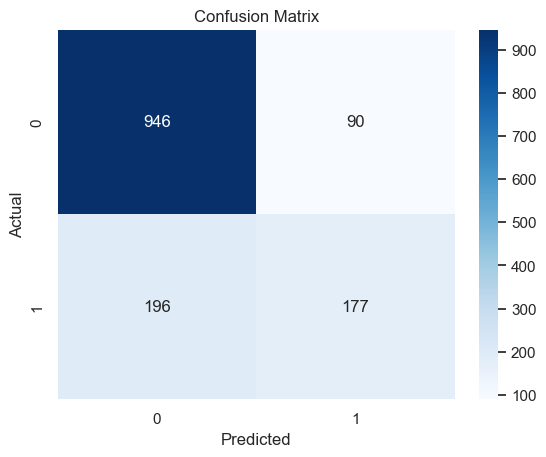

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.79      1409



In [20]:

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


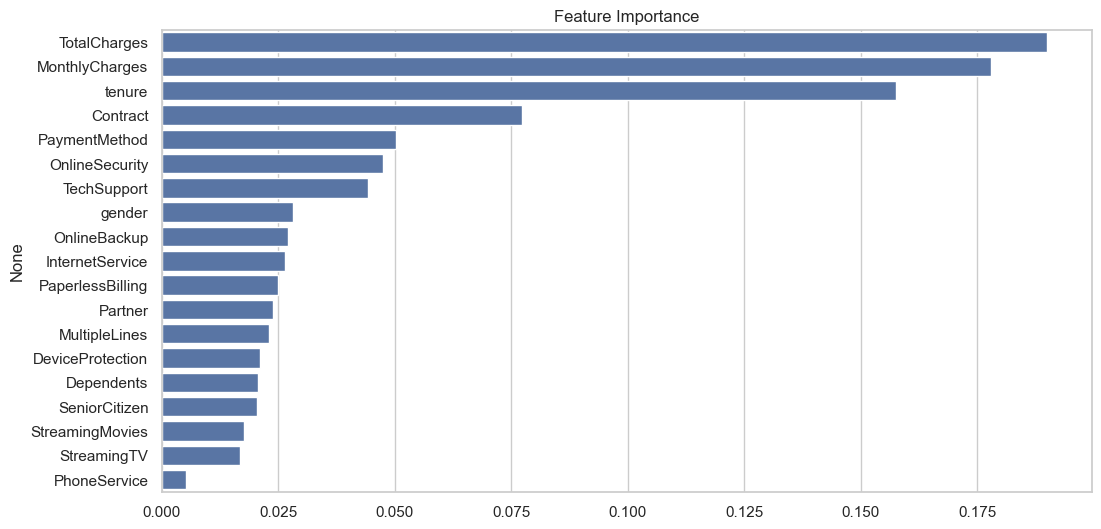

In [21]:

importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importance')
plt.show()


In [30]:

# Save model
joblib.dump(rf, 'customer_churn_model.pkl')

# Load model example
#rf_loaded = joblib.load('customer_churn_model.pkl')


['customer_churn_model.pkl']

In [31]:
# Prepare your features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Handle categorical variables (encode them)
# Convert categorical columns to numeric using LabelEncoder
categorical_cols = X.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Encode target column (if it's 'Yes'/'No')
y = le.fit_transform(y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf, 'customer_churn_model.pkl')

# Load the model back
rf_loaded = joblib.load('customer_churn_model.pkl')

# Use loaded model to predict
predictions = rf_loaded.predict(X_test)
print(predictions)

[1 0 0 ... 0 0 1]
